In [4]:
import string
import pandas as pd
import nltk as nltk
import numpy as np
import tensorflow
import random
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import pickle
import json
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
from google.colab import files

datafile = files.upload()



Saving intents.json to intents.json


In [0]:
f = open('intents.json', "r")
tokens_list = []
token_class = []
documents = []
ignore = ['?', '!']  # if current variable doesn't work use ['?', '!']
data = open('intents.json').read()
intents = json.loads(data)
lemmatizeSTR = nltk.stem.WordNetLemmatizer()


In [7]:
# intents
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:
        tk = nltk.word_tokenize(pattern)
        tokens_list.extend(tk)
        documents.append((tk, intent['tag']))

        if intent['tag'] not in token_class:
           token_class.append(intent['tag'])
            

tokens_list = [lemmatizeSTR.lemmatize(tk.lower()) for tk in tokens_list if tk not in ignore]
tokens_list = sorted(list(set(tokens_list)))

token_class = sorted(list(set(token_class)))

print(len(documents), "documents")
print(len(token_class), "class", token_class)
print(len(tokens_list), "lemmatized tk", tokens_list)

pickle.dump(tokens_list, open('tokens.pkl', 'wb'))
pickle.dump(token_class, open('class.pkl', 'wb'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
177 documents
35 class ['bad dream', 'common', 'common2', 'common3', 'did not', 'dream', 'fine', 'further details - house/fam', 'further details - house/fam1', 'further details - house/fam2', 'further details - house/fam3', 'further details - personNO', 'further details - personYES violent', 'further details-house', 'goodbye', 'greeting', 'how are you', 'in detail', 'no destination', 'no new', 'no thnks', 'no unknown', 'not fine', 'options', 'small talk', 'symbols-birth', 'symbols-death', 'symbols-house', 'thanks', 'vio no', 'vio yes', 'yes new', 'yes thnks', 'yes unknown', 'you']
169 lemmatized tk ["'s", "'ve", ',', 'a', 'all', 'alone', 'alright', 'ant', 'anyone', 'are', 'attacked', 'attacking', 'awesome', 'bad', 'balcony', 'bark', 'barking', 'be', 'bed', 'before', 'bite', 'b

In [0]:
files.download("tokens.pkl")
files.download("class.pkl")

In [16]:
# LEARNING MODEL
testModel = []
trainModel = []
null_Output = [0] * len(token_class)

for docu in documents:
    bow = []

    tk_pattern = docu[0]
    tk_pattern = [lemmatizeSTR.lemmatize(word.lower()) for word in tk_pattern]
    for tk in tokens_list:
        bow.append(1) if tk in tk_pattern else bow.append(0)

    RowOut2 = list(null_Output)
    RowOut = list(null_Output)
    RowOut[token_class.index(docu[1])] = 1
    trainModel.append([bow, RowOut])

random.shuffle(trainModel)
trainModel = np.array(trainModel)
train_x = list(trainModel[:, 0])
train_y = list(trainModel[:, 1])
lengthx = len(train_x)
midx = lengthx//10
lengthy = len(train_y)
midy = lengthy//10
test_x = train_x[:midx]
test_y = train_y[:midy]
print("training data initialized")

training data initialized


In [0]:
train_x,x_test,train_y,y_test = train_test_split(train_x,train_y, test_size=0.10,random_state=0) 


In [0]:
 # INITIALIZE MODEL

model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0, 5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [18]:
# COMPLILE
sigmoid = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sigmoid, metrics=['accuracy'])

VRB = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1,validation_data=(test_x,test_y))

print('model complete')
model.save('model.h5', VRB)
for key in VRB.history.keys():
    print(key)


Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 3.5540 - accuracy: 0.0282
Epoch 2/200
177/177 [==============================] - 0s 236us/step - loss: 3.4947 - accuracy: 0.0621
Epoch 3/200
177/177 [==============================] - 0s 236us/step - loss: 3.4670 - accuracy: 0.0960
Epoch 4/200
177/177 [==============================] - 0s 244us/step - loss: 3.3903 - accuracy: 0.1130
Epoch 5/200
177/177 [==============================] - 0s 300us/step - loss: 3.3475 - accuracy: 0.1130
Epoch 6/200
177/177 [==============================] - 0s 256us/step - loss: 3.2842 - accuracy: 0.1243
Epoch 7/200
177/177 [==============================] - 0s 247us/step - loss: 3.1670 - accuracy: 0.1469
Epoch 8/200
177/177 [==============================] - 0s 250us/step - loss: 3.1696 - accuracy: 0.1469
Epoch 9/200
177/177 [==============================] - 0s 246us/step - loss: 3.0652 - accuracy: 0.2090
Epoch 10/200
177/177 [==============================] - 0s 288us/step - los

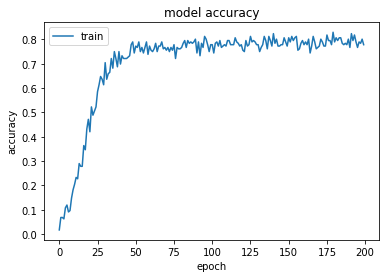

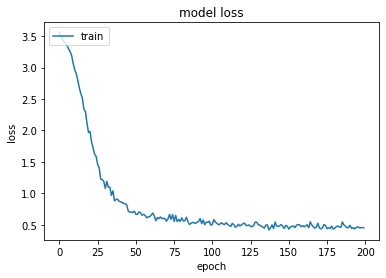

In [61]:
import matplotlib.pyplot as plt
#plot accuracy
plt.plot(VRB.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()
#plot loss
plt.plot(VRB.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss.png")
plt.show()

In [0]:
files.download("accuracy.png")
files.download("loss.png")

In [0]:
files.download("model.h5")


In [1]:
from keras.models import load_model
import json
model = load_model('model.h5')
intents = json.loads(open('intents.json').read())
words = pickle.load(open('tokens.pk1', 'rb'))
classes = pickle.load(open('class.pk1', 'rb'))




Using TensorFlow backend.


OSError: ignored

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [0]:
print(intents)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?'], 'context': ['']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time'], 'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'], 'context': ['']}, {'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me'], 'responses': ['Happy to help!', 'Any time!', 'My pleasure'], 'context': ['']}, {'tag': 'noanswer', 'patterns': [], 'responses': ["Sorry, can't understand you", 'Please give me more info', 'Not sure I understand'], 'context': ['']}, {'tag': 'options', 'patterns': ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered'], 'responses': ['I can use Natural Langu

In [0]:
#Creating GUI with tkinter
import matplotlib
matplotlib.use('Agg')
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Hello")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()

TclError: ignored